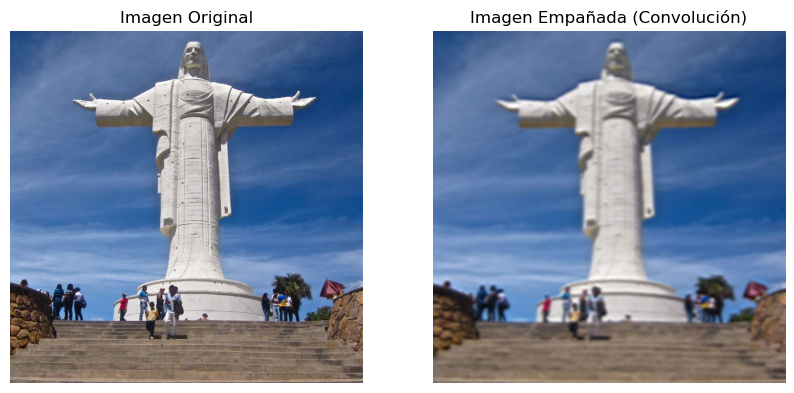

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_original = cv2.imread('..//img/cristo.jpg')
imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)

imagen_antialiasing = cv2.GaussianBlur(imagen_original, (19, 19), 0)

mascaraRara = np.array([[1, 0, 1], [0, 1, 0], [-1, 0, -1]])

imgconmask = cv2.filter2D(imagen_original, -1, mascaraRara)

imagen_empanada = cv2.filter2D(imagen_antialiasing, -1, mascaraRara)

imgenempanada = cv2.addWeighted(imgconmask,0.7,imagen_antialiasing,0.3,0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen_original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Empañada (Convolución)')
plt.imshow(imagen_empanada)
plt.axis('off')

plt.show()


Text(0.5, 1.0, 'Contados: 204')

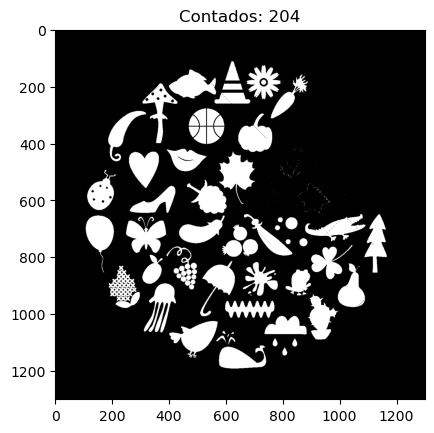

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import skimage.measure as ms


img = cv2.imread('..//img/elementos.jpg')


gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binarizada = cv2.threshold(gris, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

borde, _ = cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = len(borde)

plt.imshow(binarizada, cmap='gray')
plt.title('Contados: ' + str(cont))